<a href="https://colab.research.google.com/github/leejineun/ai-class/blob/main/5_Flower_%EC%88%98%EC%97%85_%EC%99%84%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib
from tensorflow.keras.utils import get_file
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 3s 0us/step


In [ ]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
import numpy as np
import cv2

from tqdm import tqdm

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from os import listdir

In [ ]:
for folder in listdir(data_dir) : 
    try : 
        print('{}'.format(folder), len(listdir('/root/.keras/datasets/flower_photos/{}'.format(folder)))) # print(f'{folder}', len(listdir(f'/root/.keras/datasets/flower_photos/{folder}')))
    except Exception as e : 
        print(e)
        continue

[Errno 20] Not a directory: '/root/.keras/datasets/flower_photos/LICENSE.txt'
daisy 633
dandelion 898
roses 641
sunflowers 699
tulips 799


In [ ]:
class_names = listdir(data_dir)[1:]
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
images, labels = [], []

for flower_name in tqdm(class_names) : 
    flower_folder_dir = '/root/.keras/datasets/flower_photos/{}'.format(flower_name)

    for image in tqdm(listdir(flower_folder_dir)) : 
        try : 
            image_dir = '{}/{}'.format(flower_folder_dir, image)
            image = cv2.imread(image_dir).astype('float32') / 255.

            images.append(image)
            labels.append(flower_name)
        except Exception as e: 
            print(e)
            continue

In [ ]:
len(images)

3670

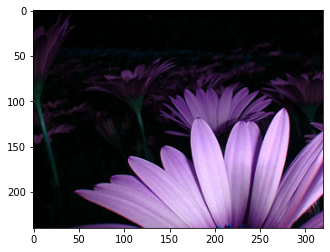

In [ ]:
plt.imshow(images[0])

In [ ]:
# plt.figure(figsize=(20,20))

# for i in range(25) : 
#     plt.subplot(5, 5, i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.imshow(image[i])
#     plt.title('Images')
# plt.show()

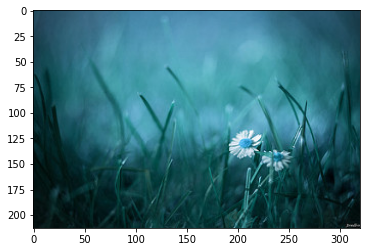

In [ ]:
plt.imshow(images[3])

In [ ]:
images = np.array(images)
labels = np.array(labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
for i in np.random.randint(1000, size=10) : 
    print(images[i].shape)

(333, 500, 3)
(333, 500, 3)
(320, 500, 3)
(240, 240, 3)
(224, 320, 3)
(240, 239, 3)
(281, 500, 3)
(240, 320, 3)
(333, 500, 3)
(333, 500, 3)


In [ ]:
len(images)

3670

In [ ]:
image_size = 64
for i, img in enumerate(images) : 
    image = cv2.resize(img, (image_size, image_size))
    images[i] = image

In [ ]:
images[0].shape

(64, 64, 3)

In [ ]:
len(images)

3670

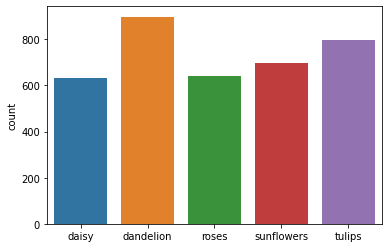

In [ ]:
sns.countplot(labels)
plt.show()

In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
# label_encoder.fit(labels)
# labels = label_encoder.transform(labels)

In [ ]:
labels

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
print(images.shape, image[0].shape)

(3670,) (64, 3)


In [ ]:
reshaped_image = np.concatenate([arr[np.newaxis] for arr in images])
reshaped_image.shape

(3670, 64, 64, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reshaped_image, labels, test_size=0.3, shuffle=True, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2569, 64, 64, 3) (2569,) (1101, 64, 64, 3) (1101,)


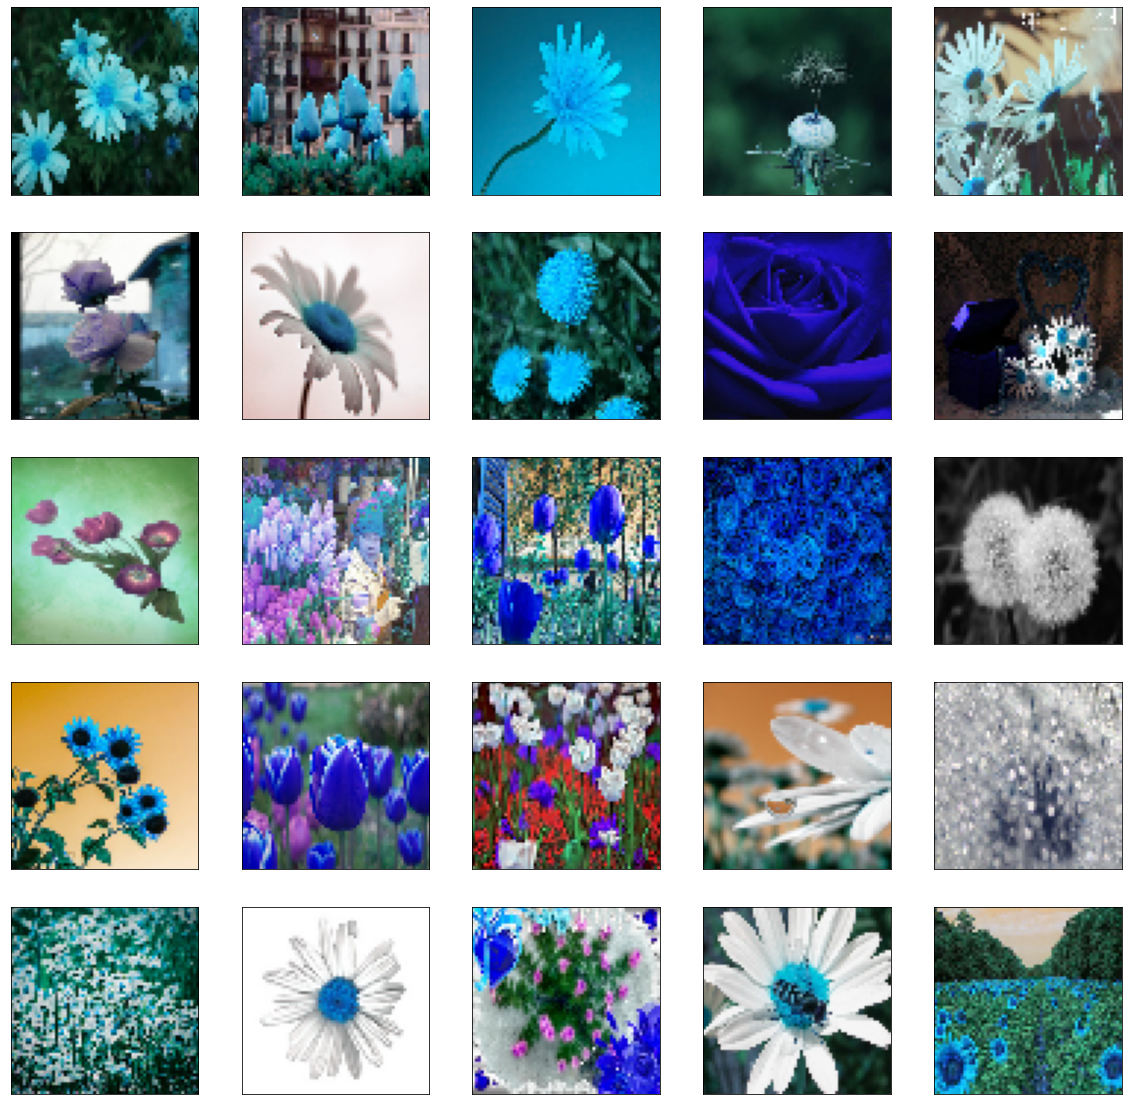

In [ ]:
plt.figure(figsize=(20,20))

for i in range(25) : 
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap='gray')
    # plt.title('Images')
plt.show()

### Data Augmentaion

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.2)

In [ ]:
test_img = datagen.flow(X_train[0].reshape(1, 64, 64, 3), batch_size=1)

Text(0.5, 1.0, 'original')

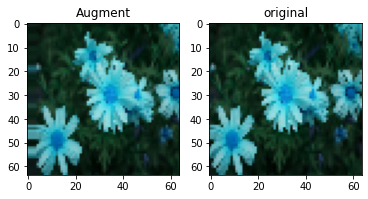

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(test_img.next().reshape(64,64,3))
plt.title('Augment')
plt.subplot(1,2,2)
plt.imshow(X_train[0])
plt.title('original')

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True)

In [ ]:
test_img = datagen.flow(X_train[0].reshape(1, 64, 64, 3), batch_size=1)

Text(0.5, 1.0, 'original')

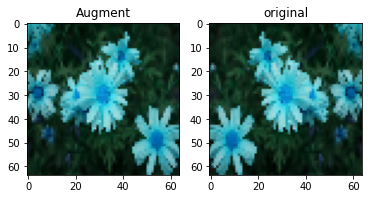

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(test_img.next().reshape(64,64,3))
plt.title('Augment')
plt.subplot(1,2,2)
plt.imshow(X_train[0])
plt.title('original')

Text(0.5, 1.0, 'original')

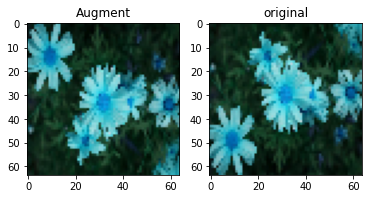

In [ ]:
datagen = ImageDataGenerator(vertical_flip=True)
test_img = datagen.flow(X_train[0].reshape(1, 64, 64, 3), batch_size=1)
plt.subplot(1, 2, 1)
plt.imshow(test_img.next().reshape(64,64,3))
plt.title('Augment')
plt.subplot(1,2,2)
plt.imshow(X_train[0])
plt.title('original')

Text(0.5, 1.0, 'original')

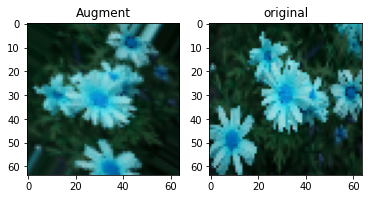

In [ ]:
datagen = ImageDataGenerator(rotation_range=120)
test_img = datagen.flow(X_train[0].reshape(1, 64, 64, 3), batch_size=1)
plt.subplot(1, 2, 1)
plt.imshow(test_img.next().reshape(64,64,3))
plt.title('Augment')
plt.subplot(1,2,2)
plt.imshow(X_train[0])
plt.title('original')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'original')

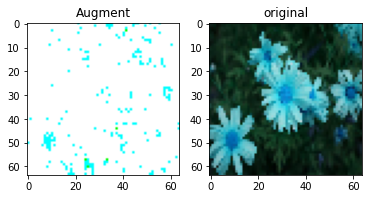

In [ ]:
datagen = ImageDataGenerator(brightness_range=[0.3, 0.7])
test_img = datagen.flow(X_train[0].reshape(1, 64, 64, 3), batch_size=1)
plt.subplot(1, 2, 1)
plt.imshow(test_img.next().reshape(64,64,3))
plt.title('Augment')
plt.subplot(1,2,2)
plt.imshow(X_train[0])
plt.title('original')

Text(0.5, 1.0, 'original')

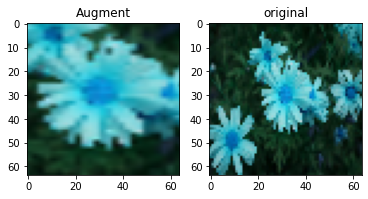

In [ ]:
datagen = ImageDataGenerator(zoom_range=[0.2, 1.2])
test_img = datagen.flow(X_train[0].reshape(1, 64, 64, 3), batch_size=1)
plt.subplot(1, 2, 1)
plt.imshow(test_img.next().reshape(64,64,3))
plt.title('Augment')
plt.subplot(1,2,2)
plt.imshow(X_train[0])
plt.title('original')

Text(0.5, 1.0, 'original')

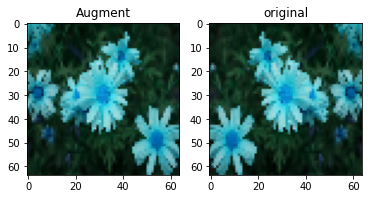

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True, zca_whitening=True)
test_img = datagen.flow(X_train[0].reshape(1, 64, 64, 3), batch_size=1)
plt.subplot(1, 2, 1)
plt.imshow(test_img.next().reshape(64,64,3))
plt.title('Augment')
plt.subplot(1,2,2)
plt.imshow(X_train[0])
plt.title('original')

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True, zca_whitening=True)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(64, 64, 3))) # X_train.shape[1:]
model.add(MaxPool2D()) # (2,2)
model.add(Dropout(0.2))

model.add(Conv2D(64, 3, padding='same', activation='relu')) # X_train.shape[1:] # input_shape=(32, 32, 32)
model.add(MaxPool2D()) # (2,2)
model.add(Dropout(0.2))

model.add(Conv2D(128, 3, padding='same', activation='relu')) # X_train.shape[1:] # input_shape=(16, 16, 64)
model.add(MaxPool2D()) # (2,2)
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
datagen.fit(X_train)

KeyboardInterrupt: ignored

In [ ]:
model.fit(datagen.flow(X_train, y_train), epochs=5)